In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [6]:
# Loading the dataset
gold_data = pd.read_csv('gld_price_data.csv')

In [7]:
# Displaying the first few rows of the dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
# Displaying the shape of the dataset
gold_data.shape

(2290, 6)

In [9]:
# Displaying information about the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# Checking for missing values in the dataset
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
# Displaying descriptive statistics of the dataset
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
numerical_columns = gold_data.select_dtypes(include=[np.number])

In [14]:
# Computing the correlation matrix
correlation = numerical_columns.corr()

In [15]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

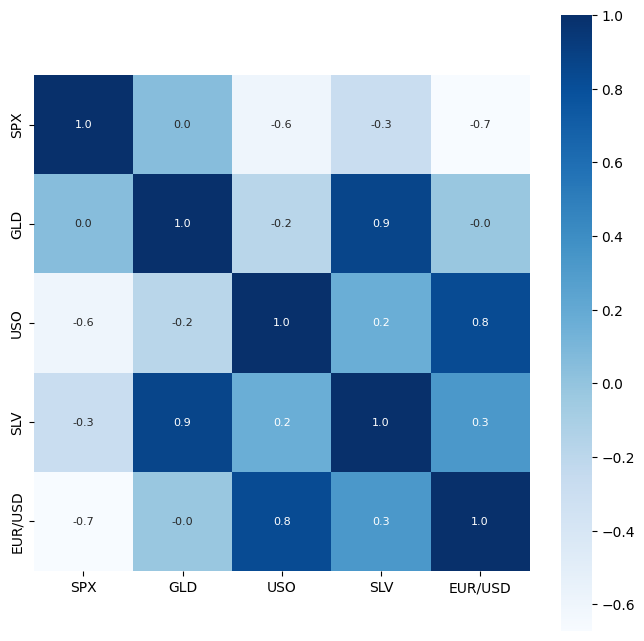

In [76]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [77]:
# Printing the correlation with the 'GLD' column
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_4124\4222609875.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


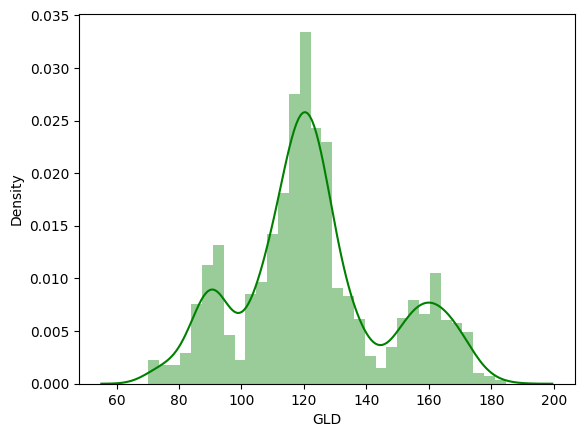

In [78]:
# Displaying a distribution plot for the 'GLD' column
sns.distplot(gold_data['GLD'],color='green')
plt.show()

In [79]:
# Preparing the data for model training
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [80]:
# Printing the feature and target variables
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [81]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [82]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [83]:
# Initializing a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100)

In [84]:
# Fitting the model to the training data
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [85]:
# Making predictions on the test data
test_data_prediction = regressor.predict(X_test)

In [86]:
# Printing the predicted values
print(test_data_prediction)

[168.63999956  82.14869995 116.04939989 127.64010091 120.83190138
 154.75369719 149.93409789 126.14220055 117.37449862 125.83800102
 116.88710109 171.9566003  141.66979714 168.15069826 115.15360026
 117.73390062 139.27310288 170.2300014  159.7531031  159.08519857
 154.97519965 125.04410037 175.15780058 157.06380223 125.15180054
  93.86769984  77.36640018 120.62959992 119.10639934 167.50449921
  88.10360087 124.9646999   91.12970052 117.85959986 121.18179938
 137.39340062 115.46810128 115.20700076 148.38549985 107.23720119
 104.23530247  87.188098   126.44920048 118.12220024 154.11149871
 119.56689969 108.28390014 108.30029811  93.19310081 127.10789788
  74.90940008 113.59269915 121.37930026 111.30049873 118.83349881
 121.08499929 159.20419949 169.45000154 147.20899717  86.08499871
  94.70150011  86.83069924  90.60680014 118.98350052 126.3946009
 127.64080033 169.08490002 122.2484994  117.57599875  98.5787001
 168.15730197 142.79229861 131.68910321 121.16840234 120.86739929
 119.6675003

In [87]:
# Calculating the R-squared value
r2_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared : ", r2_score)

R squared :  0.9890685689953032


Based on the R-squared value of 0.9890685689953032 obtained from the provided script, you can conclude that the Random Forest Regressor model has a very high predictive accuracy for the gold price dataset. This implies that the features used in the model are highly informative and are able to explain almost 99% of the variability in the gold prices.

A high R-squared value suggests that the model is an excellent fit for the data and can make highly accurate predictions for the gold prices. However, it is essential to assess the model's performance using various other evaluation metrics and techniques to ensure its robustness and generalizability to new data. Additionally, it is crucial to examine the data and the model's assumptions thoroughly to avoid potential issues such as overfitting or omitted variable bias.

In [89]:
Y_test = list(Y_test)

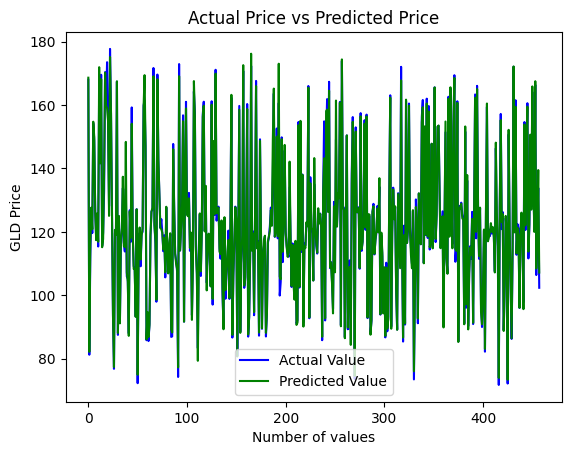

In [90]:
# Plotting the actual and predicted values for the test data
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Conclusion

Based on the provided analysis of the gold price dataset using a Random Forest Regressor model, the following conclusions can be drawn:

Data Overview: The initial exploration of the dataset shows the first and last few rows, providing a glimpse into the structure and format of the data. The info() function offers insights into the data types and the presence of any missing values. The describe() function provides summary statistics for each numerical column, offering a comprehensive view of the data distribution.

Correlation Analysis: The correlation matrix and heatmap visualization allow for the identification of relationships between different variables. The analysis helps to understand the strength and direction of the relationships between the variables, with higher correlation values indicating a stronger relationship.

Model Training and Evaluation: The Random Forest Regressor model is trained using the dataset, and predictions are made on the test data. The R-squared value of 0.989 indicates that the model has a very high predictive accuracy, explaining almost 99% of the variance in the gold prices. The close alignment between the actual and predicted values, as depicted in the plotted graph, further suggests the model's strong performance in predicting gold prices.

Overall, the analysis suggests that the Random Forest Regressor model is a suitable approach for predicting gold prices based on the given dataset. The high R-squared value indicates that the selected features are highly informative in explaining the variability in gold prices. However, further analysis and validation may be necessary to ensure the model's robustness and generalizability to new data.